<h2>Question 4</h2>

<h3> Loading the data</h3>

In [1]:
import pandas as pd
from datetime import datetime
df_post = pd.read_csv('posts.csv')
df_post['creation_date'] =  pd.to_datetime(df_post['creation_date'], format='%Y-%m-%dT%H:%M:%S.%f')
print("Completed loading post.csv")

Completed loading post.csv


<h3>Ignoring the red warnings when processing through the data. Not necessary to run the program, but it will give neat output.</h3>

In [2]:
import warnings
warnings.filterwarnings('ignore')

<h3> Main Processing </h3>

In [3]:
#Spliting the post datafram into one containing only questions
df_post_questions = df_post[df_post['post_type_id'] == 1]
print(len(df_post_questions))

#Spliting the post dataframe into one containing the first occurance of the answer ie.first answer per question
df_post_answers=df_post[df_post['post_type_id'] == 2].groupby("parent_id")
df_post_answers = df_post_answers.first()
df_post_answers = df_post_answers.reset_index()

2012348


<h4> First answer time calculation </h4>

In [5]:
list_first_answers=[]
df_post_questions=df_post_questions.iloc[:100000] # Limiting process to certain number of rows to save processing over all of the datasets
print(len(df_post_questions))
lines_to_be_dropped=[]

#Calculating first answer time of all question.
for i in range(len(df_post_questions)):
    if(i%1000==0):
        print(i,"/",len(df_post_questions)," processed")
    target_row=df_post_answers[df_post_answers['parent_id'] == df_post_questions.iloc[i].id]
    target_row=target_row.head()
    try:
        list_first_answers.append(int((target_row.creation_date-df_post_questions.iloc[i].creation_date).dt.seconds))
    except: #Faulty lines to be dropped
        lines_to_be_dropped.append(i)
#         print((target_row.creation_date-df_post_questions.iloc[i].creation_date).dt.seconds)

100000
0 / 100000  processed
1000 / 100000  processed
2000 / 100000  processed
3000 / 100000  processed
4000 / 100000  processed
5000 / 100000  processed
6000 / 100000  processed
7000 / 100000  processed
8000 / 100000  processed
9000 / 100000  processed
10000 / 100000  processed
11000 / 100000  processed
12000 / 100000  processed
13000 / 100000  processed
14000 / 100000  processed
15000 / 100000  processed
16000 / 100000  processed
17000 / 100000  processed
18000 / 100000  processed
19000 / 100000  processed
20000 / 100000  processed
21000 / 100000  processed
22000 / 100000  processed
23000 / 100000  processed
24000 / 100000  processed
25000 / 100000  processed
26000 / 100000  processed
27000 / 100000  processed
28000 / 100000  processed
29000 / 100000  processed
30000 / 100000  processed
31000 / 100000  processed
32000 / 100000  processed
33000 / 100000  processed
34000 / 100000  processed
35000 / 100000  processed
36000 / 100000  processed
37000 / 100000  processed
38000 / 100000  pr

In [6]:
print("Following lines will be dropped as it contains faulty data")
print(lines_to_be_dropped)

df_post_questions=df_post_questions.drop(df_post_questions.index[lines_to_be_dropped])
df_post_questions['first_answer_time']=list_first_answers

#Making new dataframe consisting of only the required columns ie. id, tags and first_answer_time
df_post_questions=df_post_questions[["id","tags","first_answer_time"]]

Following lines will be dropped as it contains faulty data
[849, 1621, 1630, 4117, 4835, 8803, 9180, 10965, 13785, 18119, 25595, 28038, 29787, 30246, 31117, 31506, 31734, 31997, 32244, 32618, 32731, 33400, 33571, 35423, 35679, 36282, 37814, 38614, 39595, 39838, 40220, 40263, 40818, 41750, 42727, 43504, 44135, 44162, 44340, 44375, 44760, 44906, 44930, 45732, 45852, 45922, 46126, 46259, 46724, 46941, 46995, 47435, 48127, 48145, 48233, 48238, 48308, 48321, 48792, 48824, 49663, 49720, 50102, 50151, 50428, 50625, 51441, 51605, 51986, 52216, 52595, 52909, 53848, 54462, 54550, 54570, 54779, 54982, 55650, 55735, 55781, 55931, 55982, 56585, 56643, 57042, 57484, 57706, 58030, 58039, 58097, 58354, 58383, 58405, 59741, 59876, 60019, 60443, 60580, 60731, 61513, 61614, 61758, 61967, 62050, 62141, 62349, 62486, 63436, 63693, 64089, 64175, 64422, 64644, 65726, 65889, 66261, 66276, 66355, 66737, 66945, 67259, 67444, 68037, 68297, 68544, 68826, 68918, 68972, 68989, 69244, 69288, 69494, 69849, 70059, 702

<h4> Processing tags </h4>

In [7]:
#Formating the tags field from being in format <c#><c++> to ['c#','c++'] and also getting list of unique tags
import re
tags_list=[]
unique_tags=[]

for i in range(len(df_post_questions)):
    row=df_post_questions.iloc[i]
    tags=re.split("<|><|>",row.tags)
    for j in range(len(tags)):
        if tags[j] not in unique_tags:
            unique_tags.append(tags[j])
    tags_list.append(tags[1:-1])
    
df_post_questions['tags']=tags_list #Updating the 'tags' column from <c#><c++> to ['c#','c++']

# Expanding dataframe such that elements in tags array each will 
#have a unique row in the dataframe. This will result in all rows having only a single tag value.
df=df_post_questions.explode('tags').reset_index(drop=True) 

#Calculating the medians of different unique tags
unique_tags_medians=[]
for i in range(1,len(unique_tags)):
    print(unique_tags[i])
    temp=df[df['tags'] == unique_tags[i]]
    median_time=temp.iloc[int(len(temp)/2)].first_answer_time
    unique_tags_medians.append(median_time)

c#
winforms
html
css
internet-explorer-7
conversion
j#
datetime
.net
timespan
browser
time
timezone
math
linq
web-services
.net-3.5
mysql
database
performance
algorithm
language-agnostic
unix
pi
php
triggers
c++
c
sockets
mainframe
zos
flex
actionscript-3
sql-server
datatable
vb.net
timer
architecture
plugins
form-submit
office-2007
filetypes
ruby
rdoc
eclipse
svn
aptana
subclipse
air
sql
linux
tortoisesvn
tutorials
memory
com-interop
windows
64bit
ascii
hex
asp.net
navigation
membership
sitemap
java
xml
csv
data-conversion
oop
theory
bcp
xsd
apache
versioning
embed
media
version-control
printing
annotations
youtube
reverse-engineering
pdf
colors
color-space
internationalization
globalization
migration
arrays
cloud
tag-cloud
mailto
query
git
dvcs
sqlite
forms
remote
scripting
compiler
gtk
x11
berkeley-db
collaboration
visual-studio
sorting
discussion
security
types
python
string
cross-platform
generation
web-development
ant
build-process
phing
joeltest
email
email-spam
generics
warning

<h4>Getting the top 20 in both slow and fast tags</h4>

In [8]:
#making a dataframe consisting of unique tag rows with its medians
df_medians=df.groupby("tags")
df_medians = df_medians.first()
df_medians = df_medians.reset_index()
df_medians['Median_time']=unique_tags_medians
print(df_medians)

#Dividing the dataframes into frames having slow and fast tags
df_fast_tags=df_medians[df_medians['Median_time'] < 600]    # Fast tags where median time is less then 10 minuts
df_slow_tags=df_medians[df_medians['Median_time'] > 3600*12]# Slow tags where median time is more then 12 hours
print(len(df_fast_tags))
print(len(df_slow_tags))
df_fast_tags = df_fast_tags.sort_values(['Median_time'], ascending=[True]) #Sorting dataframe
df_slow_tags = df_slow_tags.sort_values(['Median_time'], ascending=[True]) #Sorting dataframe
print(df_slow_tags)

df_fast_tags=df_fast_tags.iloc[:20] #Getting only top 20 entries from fast tags
df_slow_tags=df_slow_tags.iloc[:20] #Getting only top 20 entries from slow tags
print((df_fast_tags))
print((df_slow_tags))
top_20_fast_tags=[] #list storing top 20 fast tags
top_20_slow_tags=[] #list storing top 20 slow tags
for i in range(len(df_fast_tags)):
    top_20_fast_tags.append(df_fast_tags.iloc[i].tags)
for i in range(len(df_slow_tags)):
    top_20_slow_tags.append(df_slow_tags.iloc[i].tags)
    
print(top_20_fast_tags)
print(top_20_slow_tags)

             tags      id  first_answer_time  Median_time
0        .cs-file  236403              69535          845
1            .emf  152729               1911         1926
2       .htaccess    3157                241          202
3            .net      11                 63          250
4        .net-1.0   13832               8588         2488
...           ...     ...                ...          ...
13248     zseries  419992                 91          921
13249         zsh   43321                232        35084
13250         zsi  139212              77426          885
13251        zune  142816                609        30403
13252  zxspectrum   77507               1881           66

[13253 rows x 4 columns]
5469
1008
                      tags      id  first_answer_time  Median_time
9873                  scgi  257481               1017        43238
3188            drawstring   91521                176        43273
5688        jasper-reports  116053              17734        43372


<h4> Getting dataframes consisting only the top tags in both fast and slow categories</h4>

In [9]:
df_for_slow=df.copy()
df_for_fast=df.copy()

other_tags=[]
for i in range(len(unique_tags)):
    if((unique_tags[i] not in top_20_fast_tags)):
        other_tags.append(unique_tags[i])
print(len(other_tags))
other_tags=other_tags[1:]

for k in range(len(other_tags)):
    #print('Tag_dropped:',other_tags[i])
    if(other_tags[k] not in top_20_fast_tags):
        df_for_fast.drop(df_for_fast.loc[df_for_fast['tags'] == other_tags[k]].index, inplace=True)
    print("Length of df :",len(df_for_fast),' at other tags index :',k)
print(len(df_for_fast))

other_tags=[]
for i in range(len(unique_tags)):
    if((unique_tags[i] not in top_20_slow_tags)):
        other_tags.append(unique_tags[i])
print(len(other_tags))
other_tags=other_tags[1:]

for k in range(len(other_tags)):
    #print('Tag_dropped:',other_tags[i])
#     print(k)
#     t=t.drop(t.loc[t['tags'] == other_tags[i]].index)
    if(other_tags[k] not in top_20_slow_tags):
        df_for_slow.drop(df_for_slow.loc[df_for_slow['tags'] == other_tags[k]].index, inplace=True)
    print("Length of df :",len(df_for_slow),' at other tags index :',k)
print(len(df_for_slow))

13234
Length of df : 282657  at other tags index : 0
Length of df : 281154  at other tags index : 1
Length of df : 278891  at other tags index : 2
Length of df : 277255  at other tags index : 3
Length of df : 277133  at other tags index : 4
Length of df : 276908  at other tags index : 5
Length of df : 276902  at other tags index : 6
Length of df : 276548  at other tags index : 7
Length of df : 267203  at other tags index : 8
Length of df : 267184  at other tags index : 9
Length of df : 266878  at other tags index : 10
Length of df : 266725  at other tags index : 11
Length of df : 266635  at other tags index : 12
Length of df : 266245  at other tags index : 13
Length of df : 265258  at other tags index : 14
Length of df : 264207  at other tags index : 15
Length of df : 263705  at other tags index : 16
Length of df : 261762  at other tags index : 17
Length of df : 259818  at other tags index : 18
Length of df : 258516  at other tags index : 19
Length of df : 257526  at other tags index :

<h3> Plotting the required graphs </h3>

<h4> Plotting top fast tags where median response time is less then 10 minutes</h4>

<AxesSubplot:title={'center':'first_answer_time'}, xlabel='tags'>

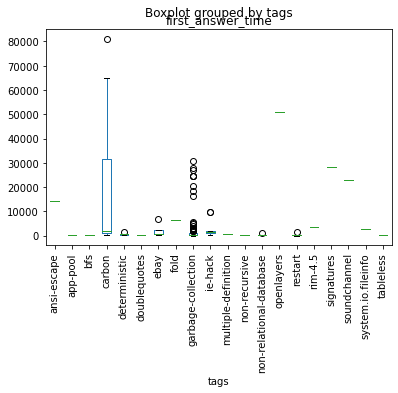

In [10]:
df_for_fast.boxplot(by ='tags', rot=90, column =['first_answer_time'], grid = False)

<h4> Plotting top slow tags where median response time is more then 12 hours</h4>

<AxesSubplot:title={'center':'first_answer_time'}, xlabel='tags'>

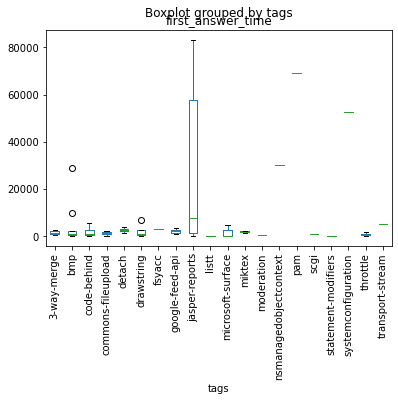

In [11]:
df_for_slow.boxplot(by ='tags', rot=90, column =['first_answer_time'], grid = False)